In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmos
from astropy.io import fits
import healpy as hp
h = cosmos.H0.value/100

In [7]:
random_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-NGC-vDR16.fits')
random_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-SGC-vDR16.fits')

quasar_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-NGC-vDR16.fits')
quasar_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-SGC-vDR16.fits')

In [8]:
data = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS_eBOSS_weight_maps/SDSSimageprop_Nside512.fits')

In [9]:
Nside = 512
Npix = hp.nside2npix(Nside)
print(f'scale: {hp.nside2resol(Nside, True)} arcmin')

scale: 6.870972823634812 arcmin


In [10]:
density_noz_m_n = density_noz_m_s = None
density_w_noz_m_n = density_w_noz_m_s = None
density_all_m_n = density_all_m_s = None
density_w_all_m_n = density_w_all_m_s = None
# to make vscode happy

In [29]:
feature = 'EBV'
for ns in ['n', 's']:
    quasar = locals()['quasar_'+ns]
    random = locals()['random_'+ns]
    w = quasar['WEIGHT_SYSTOT']#*quasar['WEIGHT_NOZ']*quasar['WEIGHT_SYSTOT']*quasar['WEIGHT_FKP']
    pix = hp.ang2pix(Nside, np.deg2rad(90 - quasar['DEC']), np.deg2rad(quasar['RA']))
    pix_u = np.unique(pix)
    pix_r = hp.ang2pix(Nside, np.deg2rad(90 - random['DEC']), np.deg2rad(random['RA']))
    pix_ur = np.unique(pix_r)

    count = np.bincount(pix, minlength=Npix)                                            # number count in each area
    count_w = np.bincount(pix, minlength=Npix, weights=w)                               # number count weighted
    Nbins = 10

    # random pixels

    pix_use = pix_ur

    counts = count[pix_use]
    counts_w = count_w[pix_use]
    A = data[feature][pix_use]

    Ebv = data['EBV'][pix_use]
    depth_g = data['DEPTH_G'][pix_use]
    sky_i = data['SKY_I'][pix_use]
    psf_i = data['PSF_I'][pix_use]

    valid = ~(np.isnan(Ebv) | np.isnan(depth_g) | np.isnan(sky_i) | np.isnan(psf_i))

    Ebv = Ebv[valid]
    depth_g = depth_g[valid]
    sky_i = sky_i[valid]
    psf_i = psf_i[valid]

    counts = counts[valid]
    counts_w = counts_w[valid]
    A = A[valid]

    outliers = np.zeros(len(counts), bool)
    for f in [Ebv, depth_g, sky_i, psf_i]:
        _min, _max = np.percentile(f, [0.5, 99.5])
        outliers |= ((f < _min) | (f > _max))
    valid = ~outliers

    counts = counts[valid]
    counts_w = counts_w[valid]
    A = A[valid]

    density = counts / counts.mean()
    density_w = counts_w / counts_w.mean()
    

    print(len(A))

    bin_edge = np.linspace(A.min(), A.max(), Nbins+1, True)
    bin_center = (bin_edge[1:] + bin_edge[:-1])/2

    dig = np.digitize(A, bin_edge)

    y = []
    yw = []
    for i in range(1, Nbins+1):
        y.append(density[dig == i].mean())
        yw.append(density_w[dig == i].mean())

    locals()['density_all_m_'+ns] = np.array(y)
    locals()['density_w_all_m_'+ns] = np.array(yw)

    # non-zero pixels
    pix_use = pix_u
    
    counts = count[pix_use]
    counts_w = count_w[pix_use]
    A = data[feature][pix_use]

    Ebv = data['EBV'][pix_use]
    depth_g = data['DEPTH_G'][pix_use]
    sky_i = data['SKY_I'][pix_use]
    psf_i = data['PSF_I'][pix_use]

    valid = ~(np.isnan(Ebv) | np.isnan(depth_g) | np.isnan(sky_i) | np.isnan(psf_i))

    Ebv = Ebv[valid]
    depth_g = depth_g[valid]
    sky_i = sky_i[valid]
    psf_i = psf_i[valid]

    counts = counts[valid]
    counts_w = counts_w[valid]
    A = A[valid]

    outliers = np.zeros(len(counts), bool)
    for f in [Ebv, depth_g, sky_i, psf_i]:
        _min, _max = np.percentile(f, [0.5, 99.5])
        outliers |= ((f < _min) | (f > _max))
    valid = ~outliers

    counts = counts[valid]
    counts_w = counts_w[valid]
    A = A[valid]

    density = counts / counts.mean()
    density_w = counts_w / counts_w.mean()

    print(len(A))
    
    dig = np.digitize(A, bin_edge)

    y = []
    yw = []
    for i in range(1, Nbins+1):
        y.append(density[dig == i].mean())
        yw.append(density_w[dig == i].mean())

    locals()['density_noz_m_'+ns] = np.array(y)
    locals()['density_w_noz_m_'+ns] = np.array(yw)



229066
135876
150182
81851


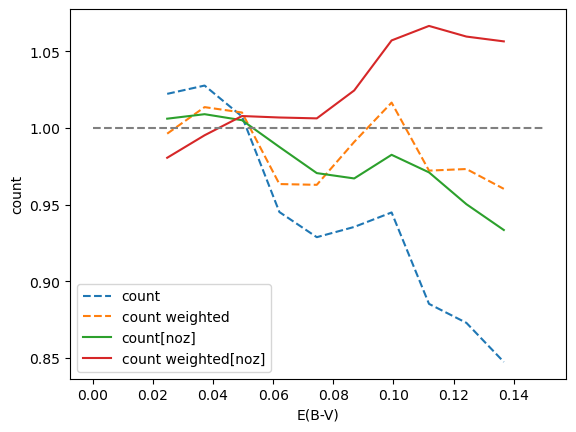

In [30]:
plt.plot(bin_center, density_all_m_n, '--', label='count')      # northern part
plt.plot(bin_center, density_w_all_m_n, '--', label='count weighted')

plt.plot(bin_center, density_noz_m_n, label='count[noz]')
plt.plot(bin_center, density_w_noz_m_n, label='count weighted[noz]')

plt.hlines(1, xmin=0, xmax=0.15, linestyles='--', colors='grey')

# plt.ylim(0.75, 1.2)

plt.xlabel('E(B-V)')
plt.ylabel('count')
plt.legend()

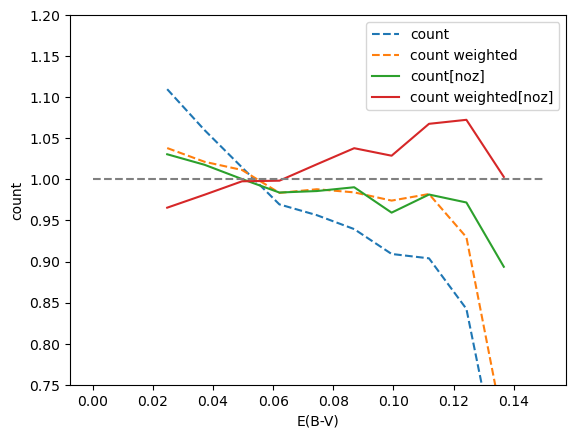

In [31]:
plt.plot(bin_center, density_all_m_s, '--', label='count')      # southern part
plt.plot(bin_center, density_w_all_m_s, '--', label='count weighted')

plt.plot(bin_center, density_noz_m_s, label='count[noz]')
plt.plot(bin_center, density_w_noz_m_s, label='count weighted[noz]')

plt.hlines(1, xmin=0, xmax=0.15, linestyles='--', colors='grey')

plt.ylim(0.75, 1.2)

plt.xlabel('E(B-V)')
plt.ylabel('count')
plt.legend()

In [32]:
# wn = (quasar_n['WEIGHT_CP']*quasar_n['WEIGHT_NOZ']*quasar_n['WEIGHT_SYSTOT']*quasar_n['WEIGHT_FKP']).sum()
# ws = (quasar_s['WEIGHT_CP']*quasar_s['WEIGHT_NOZ']*quasar_s['WEIGHT_SYSTOT']*quasar_s['WEIGHT_FKP']).sum()
random = random_n
pix_r = hp.ang2pix(Nside, np.deg2rad(90 - random['DEC']), np.deg2rad(random['RA']))
pix_ur = np.unique(pix_r)
wn = len(pix_ur)

random = random_s
pix_r = hp.ang2pix(Nside, np.deg2rad(90 - random['DEC']), np.deg2rad(random['RA']))
pix_ur = np.unique(pix_r)
ws = len(pix_ur)

norm = ws+wn
ws /= norm
wn /= norm

In [33]:
density_all = (density_all_m_s*ws + density_all_m_n*wn)
density_w_all = (density_w_all_m_s*ws + density_w_all_m_n*wn)
density_noz = (density_noz_m_s*ws + density_noz_m_n*wn)
density_w_noz = (density_w_noz_m_s*ws + density_w_noz_m_n*wn)

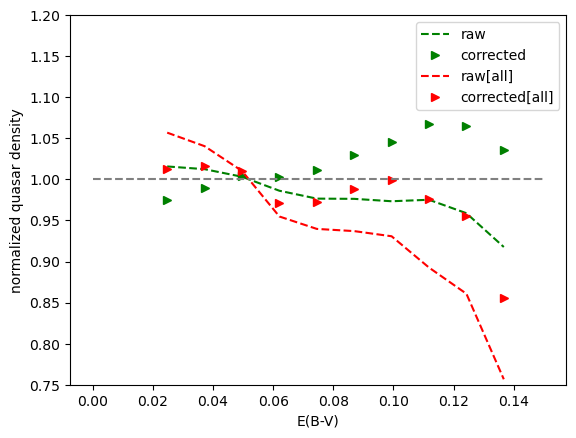

In [34]:
plt.plot(bin_center, density_noz, '--', color='green', label='raw')
plt.plot(bin_center, density_w_noz, '>', color='green', label='corrected')

plt.plot(bin_center, density_all, '--', color='red', label='raw[all]')
plt.plot(bin_center, density_w_all, '>', color='red', label='corrected[all]')

plt.hlines(1, xmin=0, xmax=0.15, linestyles='--', colors='grey')
plt.ylim(0.75, 1.2)
plt.xlabel('E(B-V)')
plt.ylabel('normalized quasar density')
plt.legend()